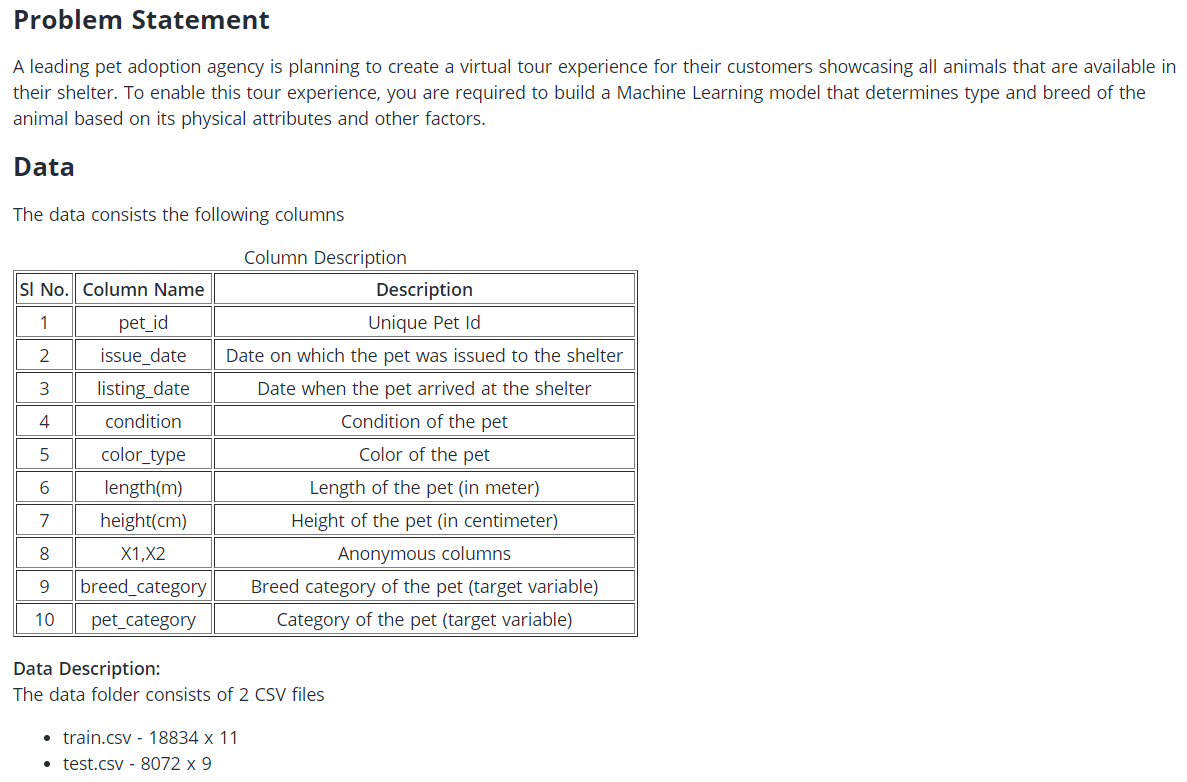

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Shape of train data:',train.shape)
print('Shape of test data:',test.shape)

Shape of train data: (18834, 11)
Shape of test data: (8072, 9)


In [4]:
train.head()

,pet_id,issue_date,listing_date,condition,color_type,length(m),height(cm),X1,X2,breed_category,pet_category
0,ANSL_69903,2016-07-10 00:00:00,2016-09-21 16:25:00,2.0,Brown Tabby,0.80,7.78,13,9,0.0,1
1,ANSL_66892,2013-11-21 00:00:00,2018-12-27 17:47:00,1.0,White,0.72,14.19,13,9,0.0,2
2,ANSL_69750,2014-09-28 00:00:00,2016-10-19 08:24:00,NaN,Brown,0.15,40.90,15,4,2.0,4
3,ANSL_71623,2016-12-31 00:00:00,2019-01-25 18:30:00,1.0,White,0.62,17.82,0,1,0.0,2
4,ANSL_57969,2017-09-28 00:00:00,2017-11-19 09:38:00,2.0,Black,0.50,11.06,18,4,0.0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18834 entries, 0 to 18833
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pet_id          18834 non-null  object 
 1   issue_date      18834 non-null  object 
 2   listing_date    18834 non-null  object 
 3   condition       17357 non-null  float64
 4   color_type      18834 non-null  object 
 5   length(m)       18834 non-null  float64
 6   height(cm)      18834 non-null  float64
 7   X1              18834 non-null  int64  
 8   X2              18834 non-null  int64  
 9   breed_category  18834 non-null  float64
 10  pet_category    18834 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 1.6+ MB


In [6]:
train.isnull().sum()[train.isnull().sum() != 0]/train.shape[0]*100

condition    7.8422
dtype: float64

In [7]:
test.isnull().sum()[test.isnull().sum() != 0]/test.shape[0]*100

condition    7.668484
dtype: float64

## <font color=blue> Univariate Analysis </font>

In [8]:
#breed_category
train.breed_category.value_counts()

0.0    9000
1.0    8357
2.0    1477
Name: breed_category, dtype: int64

In [9]:
#pet_category
train.pet_category.value_counts()

2    10621
1     7184
4      941
0       88
Name: pet_category, dtype: int64

In [10]:
#pet_id
train['pet_id'].nunique()
# As numer of unique pet_id 

18834

In [11]:
train['issue_date'] = pd.DatetimeIndex(train.issue_date)
train['listing_date'] = pd.DatetimeIndex(train.listing_date)
test['issue_date'] = pd.DatetimeIndex(test.issue_date)
test['listing_date'] = pd.DatetimeIndex(test.listing_date)

In [12]:
#condition
train.condition.value_counts()

1.0    6819
0.0    6281
2.0    4257
Name: condition, dtype: int64

Total number of color_type : 56
Unique values in color_type : ['Brown Tabby', 'White', 'Brown', 'Black', 'Red', 'Tricolor', 'Calico', 'Brown Brindle', 'Blue', 'Tortie', 'Gray', 'Fawn', 'Buff', 'Torbie', 'Orange Tabby', 'Sable', 'Tan', 'Blue Tick', 'Orange', 'Blue Tabby', 'Chocolate', 'Black Tabby', 'Black Brindle', 'Cream Tabby', 'Gold', 'Calico Point', 'Blue Merle', 'Red Merle', 'Yellow', 'Lynx Point', 'Blue Cream', 'Flame Point', 'Cream', 'Yellow Brindle', 'Blue Tiger', 'Seal Point', 'Red Tick', 'Brown Merle', 'Black Smoke', 'Gray Tabby', 'Green', 'Tortie Point', 'Blue Smoke', 'Apricot', 'Blue Point', 'Silver Tabby', 'Lilac Point', 'Silver', 'Brown Tiger', 'Liver', 'Agouti', 'Chocolate Point', 'Liver Tick', 'Pink', 'Black Tiger', 'Silver Lynx Point']


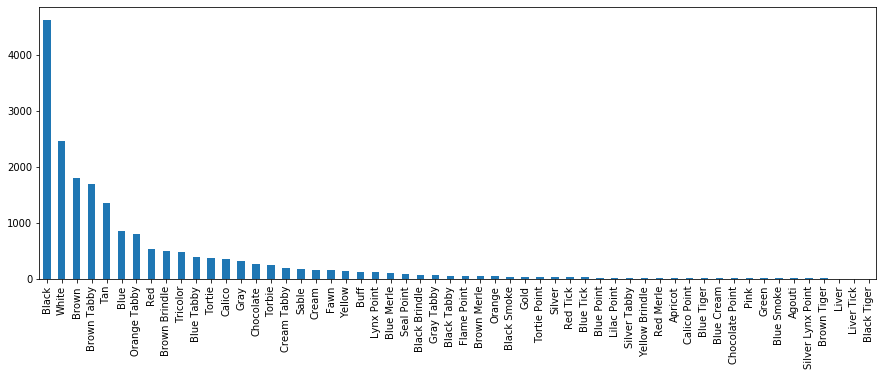

Total number of X1 : 20
Unique values in X1 : [13, 15, 0, 18, 7, 16, 11, 9, 12, 17, 2, 8, 3, 1, 4, 10, 6, 5, 19, 14]


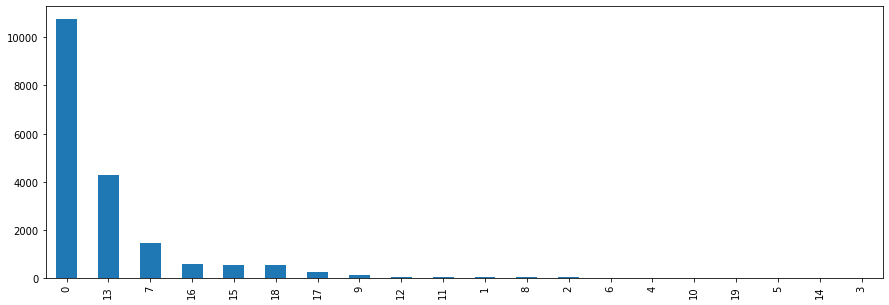

Total number of X2 : 10
Unique values in X2 : [9, 4, 1, 7, 6, 2, 8, 3, 5, 0]


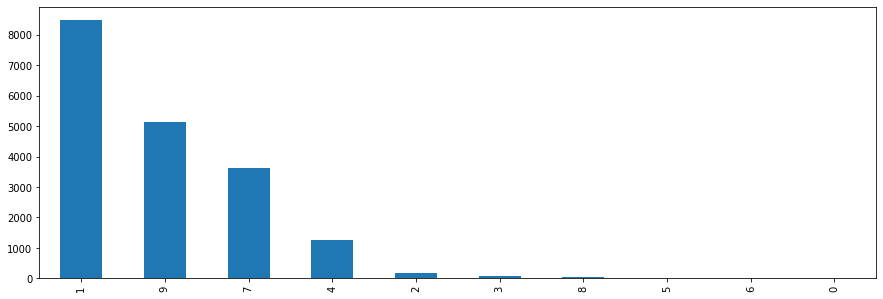

In [13]:
#color_type, X1, X2
cols = ['color_type', 'X1', 'X2']
for i in cols:
    print('Total number of',i,':',train[i].nunique())
    print('Unique values in',i,':',list(train[i].unique()))
    plt.figure(figsize=(15,5))
    train[i].value_counts().plot(kind='bar')
    plt.show()

Normality test of length: AndersonResult(statistic=212.3230708347146, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


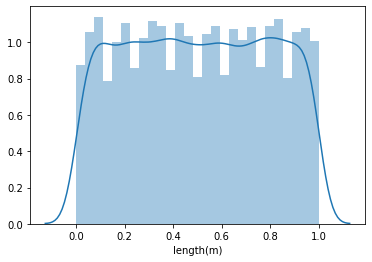

In [14]:
#length
print('Normality test of length:',stats.anderson(train['length(m)']))
sns.distplot(train['length(m)'])
plt.show()

Normality test of height: AndersonResult(statistic=210.66040631627402, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


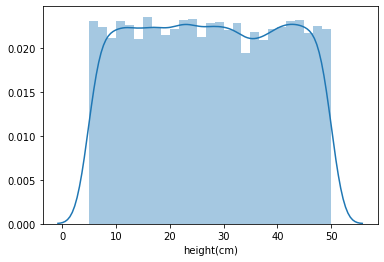

In [15]:
#height
print('Normality test of height:',stats.anderson(train['height(cm)']))
sns.distplot(train['height(cm)'])
plt.show()

### <font color = green> Summary </font>
* There are 3 categories of breeds.
* There are 4 catgeoried of pets.
* pet_id has 18834 unique values i.e there is no same pet recorded more than once.
* Condition feature has 3 levels.
* In all there are 56 colors of animals in which black is the most common color followed by white, brown, brown tabby, etc,.
* X1 feature has 20 unique values in which 0 is the most recorded entry, followed by 13, 7, 16, 15, etc,.
* X2 feature has 10 unique values in which 1 is the most occuring entry, followed by 9, 7, 4, etc,.
* Length and height both does not follow normal distribution, need to explore further.

## <font color=blue> Bivariate Analysis </font>

breed_category   0.0   1.0    All
condition                        
0.0                0  6281   6281
1.0             6819     0   6819
2.0             2181  2076   4257
All             9000  8357  17357 

pet_category   0     1      2    4    All
condition                                
0.0            0  2376   3875   30   6281
1.0            0  2218   4576   25   6819
2.0           37  2007   2110  103   4257
All           37  6601  10561  158  17357


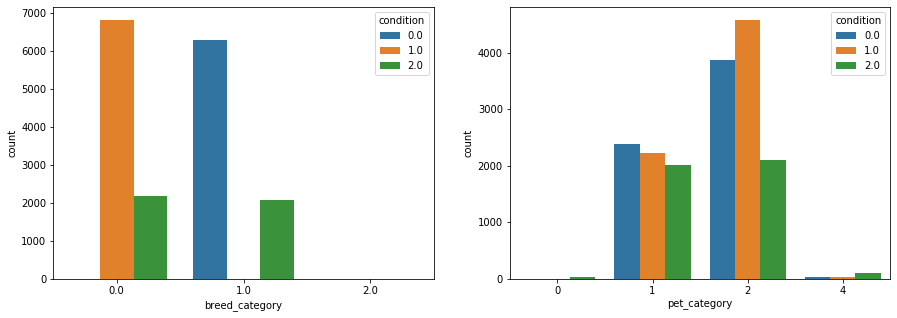

In [16]:
print(pd.crosstab(train['condition'],train['breed_category'], margins=True),'\n')
print(pd.crosstab(train['condition'],train['pet_category'], margins=True))
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.countplot('breed_category',data=train,hue='condition',ax=axes[0])
sns.countplot('pet_category',data=train,hue='condition',ax=axes[1])
plt.show()

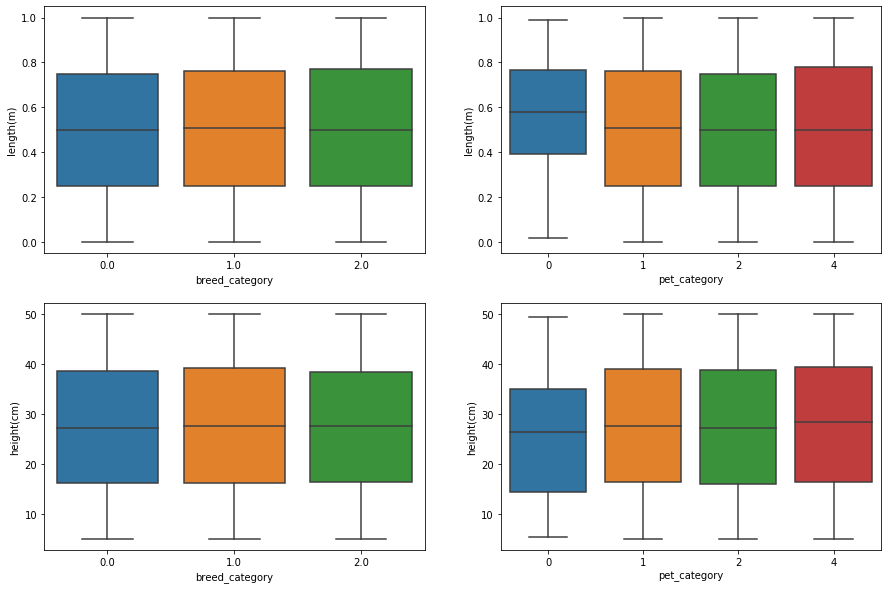

In [17]:
fig1, axes = plt.subplots(2,2,figsize=(15,10))
sns.boxplot(x='breed_category', y='length(m)', data=train, ax=axes[0][0])
sns.boxplot(x='pet_category', y='length(m)', data=train, ax=axes[0][1])
sns.boxplot(x='breed_category', y='height(cm)', data=train, ax=axes[1][0])
sns.boxplot(x='pet_category', y='height(cm)', data=train, ax=axes[1][1])
plt.show()

## <font color=blue> Missing Value Imputation </font>

In [18]:
df1 = train.copy()
df2 = test.copy()

In [19]:
print('Missing values in train data:\n',df1.isnull().sum()[df1.isnull().sum() != 0])
print('Missing values in test data:\n',df2.isnull().sum()[df2.isnull().sum() != 0])

Missing values in train data:
 condition    1477
dtype: int64
Missing values in test data:
 condition    619
dtype: int64


In [20]:
df1.fillna(df1.condition.mode()[0], inplace=True)
df2.fillna(df2.condition.mode()[0], inplace=True)

In [21]:
print('Missing values in train data:',df1.isnull().sum().max())
print('Missing values in test data:',df2.isnull().sum().max())

Missing values in train data: 0
Missing values in test data: 0


## <font color=blue> Feature Engineering </font>

In [22]:
df1['days_gap'] = (df1['listing_date'] - df1['issue_date']).dt.days
df1['days_gap'] = round(df1['days_gap'] + (((df1['listing_date'] - df1['issue_date']).dt.seconds)/86400), 2)
df2['days_gap'] = (df2['listing_date'] - df2['issue_date']).dt.days 
df2['days_gap'] = round(df2['days_gap'] + (((df2['listing_date'] - df2['issue_date']).dt.seconds)/86400), 2)

In [23]:
df1.drop(['pet_id', 'issue_date', 'listing_date'], axis=1, inplace=True)
df2.drop(['pet_id', 'issue_date', 'listing_date'], axis=1, inplace=True)

## <font color=blue> One Hot Encoding </font>

In [24]:
df1 = pd.get_dummies(df1, columns=['color_type','X1','X2'], drop_first=True)
df2 = pd.get_dummies(df2, columns=['color_type','X1','X2'], drop_first=True)

In [25]:
print('Shape of df1:',df1.shape)
print('Shape of df2:',df2.shape)

Shape of df1: (18834, 89)
Shape of df2: (8072, 83)


In [26]:
l1 = []
trclr = list(train.color_type.unique())
teclr = list(test.color_type.unique())
for i in trclr:
    if i not in teclr:
        l1.append(i)
print('Values not in test color_type:',l1)

l2 = []
trX1 = list(train.X1.unique())
teX1 = list(test.X1.unique())
for i in trX1:
    if i not in teX1:
        l2.append(i)
print('Values not in test X1:',l2)

l3 = []
trX2 = list(train.X2.unique())
teX2 = list(test.X2.unique())
for i in trX2:
    if i not in teX2:
        l3.append(i)
print('Values not in test X2:',l3)

Values not in test color_type: ['Brown Tiger', 'Black Tiger']
Values not in test X1: [3, 19]
Values not in test X2: []


In [27]:
df1.drop(['color_type_Black Tiger','color_type_Brown Tiger','X1_3','X1_19'], axis=1, inplace=True)

In [28]:
print('Shape of df1:',df1.shape)
print('Shape of df2:',df2.shape)

Shape of df1: (18834, 85)
Shape of df2: (8072, 83)


In [29]:
df1 = df1.astype({'condition':int, 'breed_category':int})
df2 = df2.astype({'condition':int})

## <font color=blue> Modelling </font>

In [30]:
y = df1[['breed_category','pet_category']]
X = df1.drop(['breed_category','pet_category'], axis=1)
Xtest = df2.copy()

### <font color = green> BaseModel </font>

In [31]:
dtree = DecisionTreeClassifier()
dtree.fit(X, y)

y_pred = dtree.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('dt.csv', index=False)

In [32]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X, y)

y_pred = rf.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('rf.csv', index=False)

In [33]:
etree = ExtraTreeClassifier(random_state=0)
etree.fit(X,y)

y_pred = etree.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('etree.csv', index=False)

In [34]:
etrees = ExtraTreesClassifier()
etrees.fit(X, y)

y_pred = etrees.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('etrees.csv', index=False)

### <font color = green> MultiOutputClassifier  </font>

In [35]:
dtree = DecisionTreeClassifier()
multitarget_dtree = MultiOutputClassifier(dtree, n_jobs=-1)
multitarget_dtree.fit(X, y)

y_pred = multitarget_dtree.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('multitarget_dt.csv', index=False)

In [36]:
rf = RandomForestClassifier()
multitarget_rf = MultiOutputClassifier(rf, n_jobs=-1)
multitarget_rf.fit(X, y)

y_pred = multitarget_rf.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('multitarget_rf.csv', index=False)

In [37]:
etree = ExtraTreeClassifier()
multitarget_etree = MultiOutputClassifier(etree, n_jobs=-1)
multitarget_etree.fit(X, y)

y_pred = multitarget_etree.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('multitarget_etree.csv', index=False)

In [38]:
etrees = ExtraTreesClassifier()
multitarget_etrees = MultiOutputClassifier(etrees, n_jobs=-1)
multitarget_etrees.fit(X, y)

y_pred = multitarget_etrees.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('multitarget_etrees.csv', index=False)

In [39]:
gbcl = GradientBoostingClassifier()
multitarget_gbcl = MultiOutputClassifier(gbcl, n_jobs=-1)
multitarget_gbcl.fit(X, y)

y_pred = multitarget_gbcl.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('multitarget_gbcl.csv', index=False)

In [40]:
rf = RandomForestClassifier()
abrf = AdaBoostClassifier(rf, random_state=0)
multitarget_abrf = MultiOutputClassifier(abrf, n_jobs=-1)
multitarget_abrf.fit(X, y)

y_pred = multitarget_abrf.predict(Xtest)
y_pred = pd.DataFrame(y_pred)

solution = pd.DataFrame({'pet_id':test.pet_id, 'breed_category':y_pred[0], 'pet_category':y_pred[1]})
solution.to_csv('multitarget_abrf.csv', index=False)